## **PROJECT BY: SAMIT SHETTY**
# **BATCH: APRIL 22** 

<a name = Section0></a>
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Handling of Missing Data**](#Section51)
  - **5.2** [**Data  Post Profiling**](#Section53)


**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing and Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)
  - **7.2** [**Data Preparation**](#Section72)

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Logistic Regression**](#Section81)
  - **8.2** [**Decision Tree Model**](#Section82)
  - **8.3** [**Random Forest Tree Model**](#Section83)
  - **8.4** [**K-Nearest Neighbour Model**](#Section84)
  - **8.5** [**ADA Boost Model**](#Section85)
  - **8.6** [**XG Boost Model**](#Section86)

**9.** [**Hyper Parameter Tuning with Grid Searh CV**](#Section9)<br>
  - **9.1** [**Tuned Logistic Regression**](#Section91)
  - **9.2** [**Tuned Decision Tree Model**](#Section92)
  - **9.3** [**Tuned Random Forest Tree Model**](#Section93)
  - **9.4** [**Tuned K-Nearest Neighbour Model**](#Section94)
  - **9.5** [**Tuned ADA Boost Model**](#Section95)
  - **9.6** [**Tuned XG Boost Model**](#Section96)

**10.** [**Hyper Parameter Tuning with Randomized Searh CV**](#Section10)<br>
  - **10.1** [**Tuned Logistic Regression**](#Section101)
  - **10.2** [**Tuned Decision Tree Model**](#Section102)
  - **10.3** [**Tuned Random Forest Tree Model**](#Section103)
  - **10.4** [**Tuned K-Nearest Neighbour Model**](#Section104)
  - **10.5** [**Tuned ADA Boost Model**](#Section105)
  - **10.6** [**Tuned XG Boost Model**](#Section106)

**11.** [**Model Optimzation**](#Section11)<br>

**12.** [**Evaluation of the Test Data**](#Section12)<br>

**13.** [**Conclusion**](#Section13)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

**Company Introduction**

Client for this project is aa Healthcare Institute

- They are going to provide early methods to detect heart attacks for their customers.
-The idea is to use data to classify the presence of heart disease in the patient.
-The System uses patient data and gives an early warning to the patient whether he is going to suffer from a heart attack or not .

**Current Scenario**

- The company rolled out this wearable system for real-time detection and warning of heart attacks service to about 10,000+ of its customers.


[*Go Back to Index*](#Section0)<br>

---
<a name = Section2></a>
# **2. Problem Statement**
---
**The current process suffers from the following problems:**

- Every year about 735,000 people have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
- The company wants to create a good data-driven system for predicting heart disease that can improve the entire research and prevention process, making sure that more people can live healthy lives.

The company has hired you as a data science consultant.

They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech rather than doing this manual work.

**Our Role**

- You are given datasets of past customers and their status ( heart_diseases_status 1 or 0).
- Your task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**
- Deliverable: The goal is to predict whether a patient has a heart disease or not..
- Machine Learning Task: Classification
- Target Variable: heart_disease_present(no heart disease present (0) / heart disease present(1))
- Win Condition: N/A (best possible model)

**Evaluation Metric**

- The model evaluation will be based on the FI Score, Accuracy Score.

[*Go Back to Index*](#Section0)<br>

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [92]:
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.16 s (started: 2023-02-04 07:39:23 +00:00)


In [93]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.utils import resample

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

time: 12.6 ms (started: 2023-02-04 07:39:27 +00:00)


[*Go Back to Index*](#Section0)<br>

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

We are provided with a dataset containing all the necessary information about the customers like their age,chest paint type,resting blood pressure,maximum heart rate achieved, etc.

The column **Output** is also present in the dataset which has two values 1 and 0 which corresponds to "There is a Risk" and "There is no Risk".

The dataset is divided into two parts: Train, and Test sets.

** Train Set:**
- The train set contains 242 rows and 14 columns.
- The last column output is the target variable.

** Test Set:**
- The test set contains 61 rows and 13 columns.
- The test set doesn’t contain the output column.
- It needs to be predicted for the test set.

**Dataset Feature Description**

The Dataset contains the following columns:


| Id | Features | Description |
| :-- | :--| :--| 
|00|**Number**|Unique identifier|
|01|**age**|Age in Year.|
|02|**sex**|Gender 0: Female 1: Male.| 
|03|**cp**| Chest Pain Type 4 Values 0:Typical 1:Atypical 2:Non-anginal 3: Asymptmatic.|
|04|**trtbps**| resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern.|
|05|**chol**|serum cholesterol in mg/dl, above 200 is cause for concern.|
|06|**fbs**|Fasting Blood pressure >120mg/dl,1=True 0=False|
|07|**restecg**|Resting ECG results Values 0:Nothing to note,1:ST-T Wave abnormality,2:Possible or definite left ventricular hypertrophy|
|08|**thalachh**|maximum heart rate achieved|
|09|**exng**|Exercise induced Chest Pain( O: False, 1: True.|
|10|**oldpeak**|oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms|
|11|**slp**|the slope of the peak exercise ST segment, 0: Upsloping 1: Flatsloping 2: Downslopins: signs of unhealthy heart|
|12|**caa**|number of major vessels (0-3) colored by flourosopy, the more blood movement the better (no clots)|
|13|**thall**|results of thallium stress test 1,3: normal, 6: fixed defect: used to be defect but ok now, 7: reversable defect: no proper blood movement when excercising.|
|14|**output**|heart_disease_present 0: Low Risk, 1: High Risk|



In [94]:
had = pd.read_excel("https://github.com/Samit8878/samitcolab/blob/main/heart_train.xlsx?raw=true")


time: 673 ms (started: 2023-02-04 07:39:27 +00:00)


In [95]:
had.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    242 non-null    float64
 1   age       242 non-null    float64
 2   sex       242 non-null    float64
 3   cp        242 non-null    float64
 4   trtbps    242 non-null    float64
 5   chol      242 non-null    float64
 6   fbs       242 non-null    float64
 7   restecg   242 non-null    float64
 8   thalachh  242 non-null    float64
 9   exng      242 non-null    float64
 10  oldpeak   242 non-null    float64
 11  slp       242 non-null    float64
 12  caa       242 non-null    float64
 13  thall     242 non-null    float64
 14  output    242 non-null    float64
dtypes: float64(15)
memory usage: 28.5 KB
time: 21.1 ms (started: 2023-02-04 07:39:28 +00:00)


[*Go Back to Index*](#Section0)<br>

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [96]:
had.head()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,132.00000,42.00000,1.00000,1.00000,120.00000,295.00000,0.00000,1.00000,162.00000,0.00000,0.00000,2.00000,0.00000,2.00000,1.00000
1,202.00000,58.00000,1.00000,0.00000,150.00000,270.00000,0.00000,0.00000,111.00000,1.00000,0.80000,2.00000,0.00000,3.00000,0.00000
2,196.00000,46.00000,1.00000,2.00000,150.00000,231.00000,0.00000,1.00000,147.00000,0.00000,3.60000,1.00000,0.00000,2.00000,0.00000
3,75.00000,55.00000,0.00000,1.00000,135.00000,250.00000,0.00000,0.00000,161.00000,0.00000,1.40000,1.00000,0.00000,2.00000,1.00000
4,176.00000,60.00000,1.00000,0.00000,117.00000,230.00000,1.00000,1.00000,160.00000,1.00000,1.40000,2.00000,2.00000,3.00000,0.00000


time: 16.2 ms (started: 2023-02-04 07:39:28 +00:00)


In [97]:
had.describe()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000,242.00000
mean,150.18595,54.46281,0.65702,0.99174,130.35950,246.84298,0.12810,0.55372,150.11570,0.31405,1.01322,1.42149,0.68182,2.30165,0.54959
std,86.85588,9.20449,0.47569,1.02253,16.82886,52.79547,0.33489,0.53041,22.35240,0.46510,1.10258,0.60772,0.99062,0.59381,0.49857
min,0.00000,29.00000,0.00000,0.00000,94.00000,131.00000,0.00000,0.00000,88.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,74.25000,48.00000,0.00000,0.00000,120.00000,212.00000,0.00000,0.00000,136.00000,0.00000,0.00000,1.00000,0.00000,2.00000,0.00000
50%,152.00000,55.50000,1.00000,1.00000,130.00000,239.50000,0.00000,1.00000,154.00000,0.00000,0.80000,1.00000,0.00000,2.00000,1.00000
75%,221.75000,61.00000,1.00000,2.00000,140.00000,274.75000,0.00000,1.00000,165.75000,1.00000,1.60000,2.00000,1.00000,3.00000,1.00000
max,302.00000,77.00000,1.00000,3.00000,192.00000,564.00000,1.00000,2.00000,202.00000,1.00000,5.60000,2.00000,4.00000,3.00000,1.00000


time: 62.2 ms (started: 2023-02-04 07:39:28 +00:00)


In [98]:
had.nunique()

Number      242
age          40
sex           2
cp            4
trtbps       45
chol        137
fbs           2
restecg       3
thalachh     83
exng          2
oldpeak      38
slp           3
caa           5
thall         4
output        2
dtype: int64

time: 10.3 ms (started: 2023-02-04 07:39:28 +00:00)


**Observation:**

- The Train Data consists of 300,000 rows, with no missing values.
- There are total 11 columns
- 3 Columns are of Object Datatype, Gender, Vehicle_Age, Veehicle_Damage
- Other than Age, Region, Annual_Premium, Policy Sales Channel & Vintage, the rest are categorical with Binary code
- Response is the Target Variable

- The Test Data contains 81109 rows



<a name = Section51></a>
### **5.1 Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [99]:
had.isnull().sum()

Number      0
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

time: 10.4 ms (started: 2023-02-04 07:39:28 +00:00)


In [100]:
duplicate=had[had.duplicated()]

time: 6.86 ms (started: 2023-02-04 07:39:28 +00:00)


**Observation:**

- There are no missing Values

- There are no duplicates

The Data is clear and good for ** EDA**


<a name = Section53></a>
### **5.2 Data Profiling**

- In this section, we will run the Profile Report 



[*Go Back to Index*](#Section0)<br>

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---
In this section we will check the following.

- Correlation between the features

Text(0.5, 1.0, 'Correlation between features')

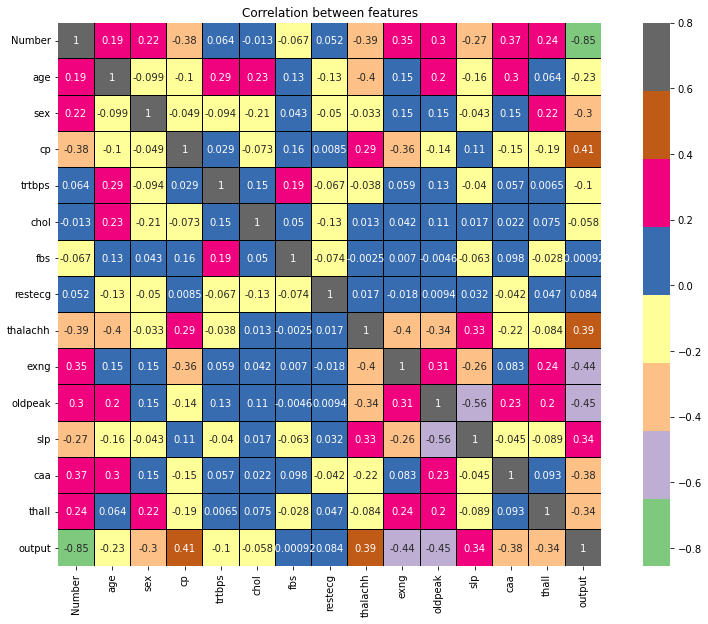

time: 1.82 s (started: 2023-02-04 07:39:28 +00:00)


In [101]:
corr = had.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, vmax=.8, linewidth=.01, square = True, annot = True,cmap='Accent',linecolor ='black')
plt.title('Correlation between features')

**OUTPUT**

*Correlation between the features*
- There is a Negative Correlation between Output & Number but as indicated the Number is unique No.


**HISTOGRAM**

We will be plotting the Histogram of the Variables which would provide us insigth

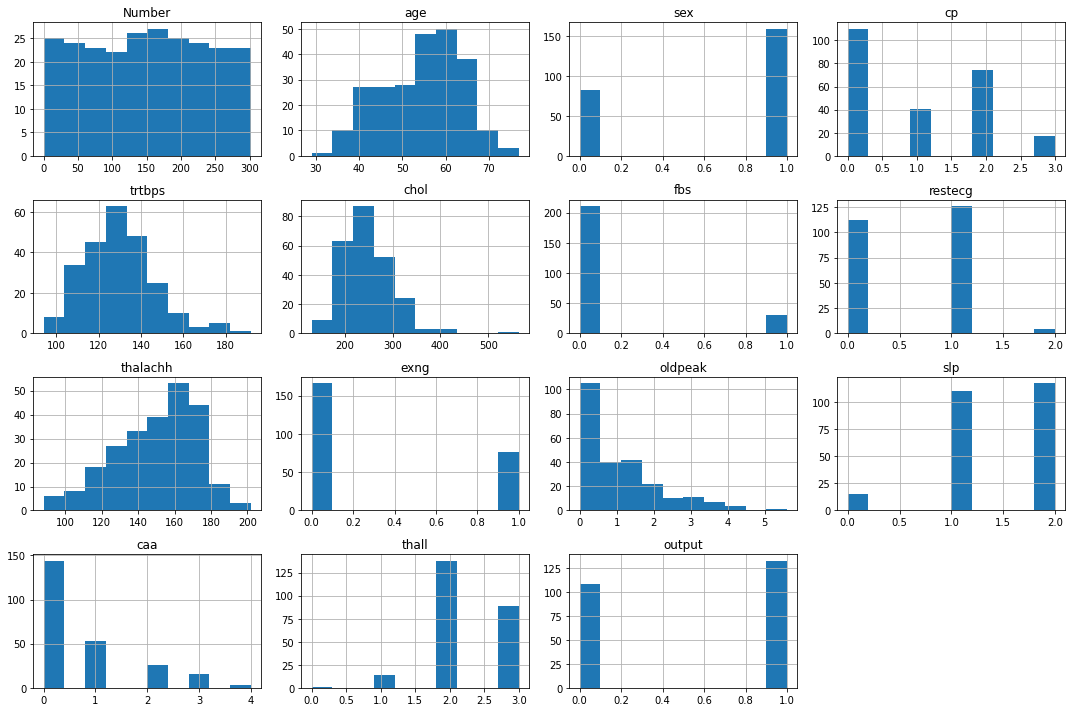

time: 2.59 s (started: 2023-02-04 07:39:30 +00:00)


In [102]:
had.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

**OUTPUT**

Based on Histogram and nunique values,
- 8 Variables are categorical in nature with all values in int
- 5 Variables are continuous in nature 

**CATEGORICAL VARIABLES**

We will be creating plots for the Categorical feastures, with respect to the output.
With this we can evaluate the relation of the values and the trends based on Output
The first Plot for each Category will be w.r.t 0: i.e Low Risk
The Second Plot for each Category will be w.r.t 1: i.e. High Risk

In [103]:
had.columns

Index(['Number', 'age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg',
       'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

time: 5.34 ms (started: 2023-02-04 07:39:32 +00:00)


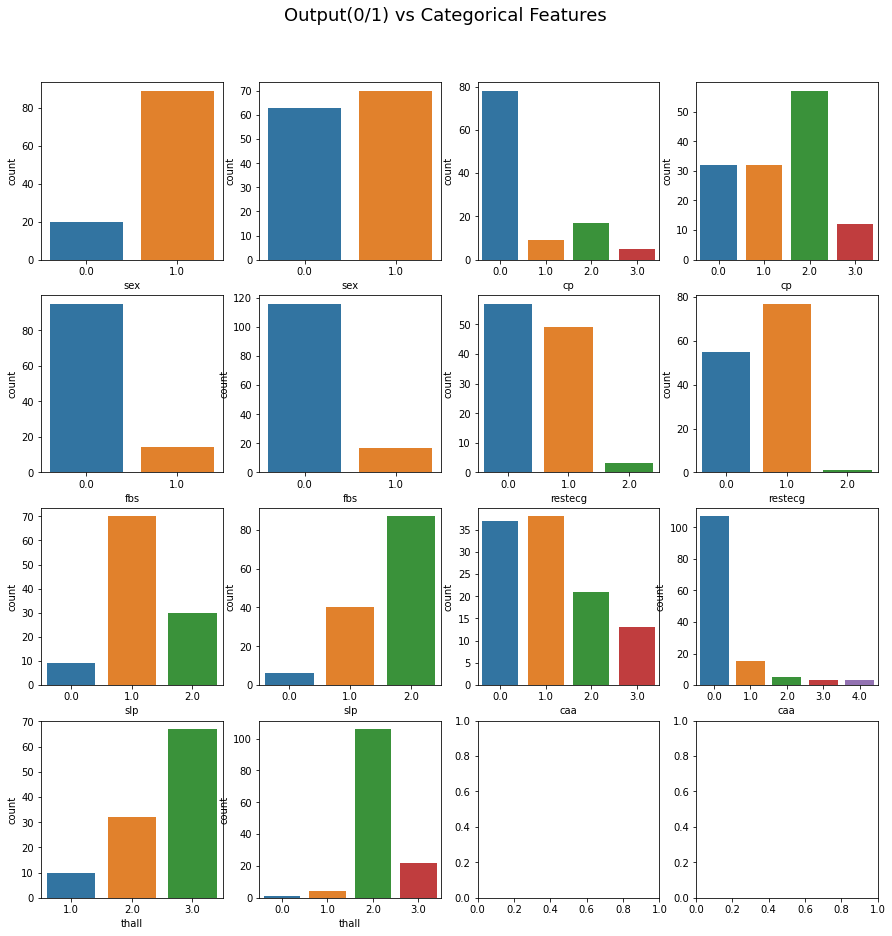

time: 2 s (started: 2023-02-04 07:39:32 +00:00)


In [104]:
from tables.utils import count_logged_instances
figure, axes=plt.subplots (4,4, figsize=(15,15))
figure.suptitle("Output(0/1) vs Categorical Features", fontsize=18, y=0.95)

S1=had['sex'][had['output']==0]
S2=had['sex'][had['output']==1]
sns.countplot(S1, ax=axes[0,0])
sns.countplot(S2, ax=axes[0,1],)

CP1=had['cp'][had['output']==0]
CP2=had['cp'][had['output']==1]
sns.countplot(CP1, ax=axes[0,2] )
sns.countplot(CP2, ax=axes[0,3] )

FBS1=had['fbs'][had['output']==0]
FBS2=had['fbs'][had['output']==1]
sns.countplot(FBS1, ax=axes[1,0] )
sns.countplot(FBS2, ax=axes[1,1] )

RE1=had['restecg'][had['output']==0]
RE2=had['restecg'][had['output']==1]
sns.countplot(RE1, ax=axes[1,2] )
sns.countplot(RE2, ax=axes[1,3] )

SLP1=had['slp'][had['output']==0]
SLP2=had['slp'][had['output']==1]
sns.countplot(SLP1, ax=axes[2,0])
sns.countplot(SLP2, ax=axes[2,1])

CA1=had['caa'][had['output']==0]
CA2=had['caa'][had['output']==1]
sns.countplot(CA1, ax=axes[2,2])
sns.countplot(CA2, ax=axes[2,3])

TH1=had['thall'][had['output']==0]
TH2=had['thall'][had['output']==1]
sns.countplot(TH1, ax=axes[3,0])
sns.countplot(TH2, ax=axes[3,1])







**OUTPUT**

**CATEGORICAL FEATURES**

1. **SEX** : 66% are Male and 34% are Female. Total 54% are Low Risk 45% are High Risk. Male: 50% approx are in both low and high Risk. Female: 75% are high Risk 25% are low Risk
1. **CP** : 0: 75% in Low Risk a and 25% in High Risk, 1-3: 25% in Low Risk a and 75% in High Risk. HenceOther than 0 rest are all in High Risk
1. **FBS** : The distribution is equal in both 0 & 1, with slightly higher count in 0,
1. **restecg** : 0: is even in both 0&1, 1: is with higher risk, 2 is low
1. **slp** : 1: is more with Low risk, 2:is with higher risk
1. **caa** : 0: is more inclined with count towards high risk
1. **thall**: 0&1 is low risk, 2:is higher risk, whereas 3 is only high Risk

                

**Continuous VARIABLES**

We will be creating distribution plots for the Continuous feastures, with respect to the output.
With this we can evaluate the relation of the values and the trends based on Output
The first Plot for each Category will be w.r.t 0: i.e Low Risk
The Second Plot for each Category will be w.r.t 1: i.e. High Risk

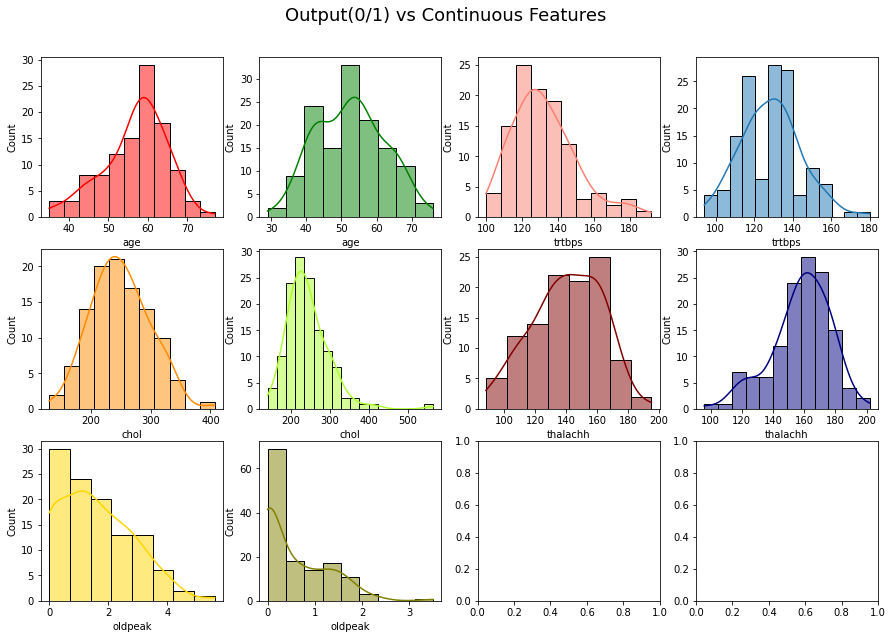

time: 2.05 s (started: 2023-02-04 07:39:34 +00:00)


In [105]:
figure, axes=plt.subplots (3,4, figsize=(15,10))
figure.suptitle("Output(0/1) vs Continuous Features", fontsize=18, y=0.95)

A1=had['age'][had['output']==0]
A2=had['age'][had['output']==1]
sns.histplot(data=had,x=A1,kde=True, ax=axes[0,0], color='red' )
sns.histplot(data=had,x=A2,kde=True, ax=axes[0,1], color='Green' )

T1=had['trtbps'][had['output']==0]
T2=had['trtbps'][had['output']==1]
sns.histplot(data=had,x=T1,kde=True, ax=axes[0,2], color='salmon'  )
sns.histplot(data=had,x=T2,kde=True, ax=axes[0,3] )

C1=had['chol'][had['output']==0]
C2=had['chol'][had['output']==1]
sns.histplot(data=had,x=C1,kde=True, ax=axes[1,0],color='darkorange' )
sns.histplot(data=had,x=C2,kde=True, ax=axes[1,1], color='Greenyellow' )

TH1=had['thalachh'][had['output']==0]
TH2=had['thalachh'][had['output']==1]
sns.histplot(data=had,x=TH1,kde=True, ax=axes[1,2], color='maroon' )
sns.histplot(data=had,x=TH2,kde=True, ax=axes[1,3], color='navy' )

OP1=had['oldpeak'][had['output']==0]
OP2=had['oldpeak'][had['output']==1]
sns.histplot(data=had,x=OP1,kde=True, ax=axes[2,0],color='gold' )
sns.histplot(data=had,x=OP2,kde=True, ax=axes[2,1],color='olive' )


In [106]:
had['age']=pd.cut(x=had['age'], bins=[20, 40, 60, 99],labels=[0, 1, 2])


time: 8.3 ms (started: 2023-02-04 07:39:36 +00:00)


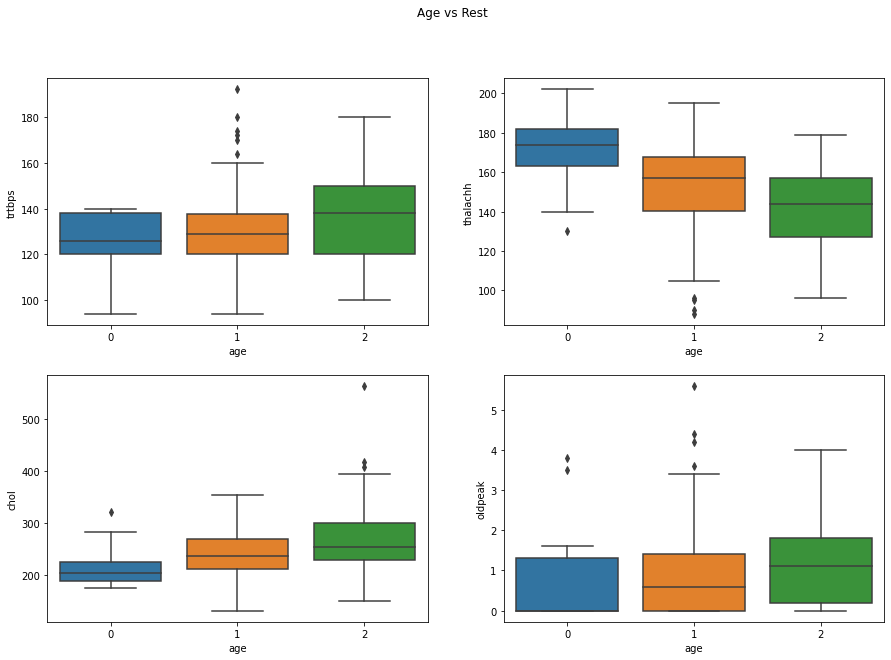

time: 826 ms (started: 2023-02-04 07:39:37 +00:00)


In [107]:
figure, axes=plt.subplots (2,2, figsize=(15,10))
figure.suptitle('Age vs Rest')
sns.boxplot(x=had['age'],y=had['trtbps'],data=had, ax=axes [0,0])
sns.boxplot(x=had['age'],y=had['thalachh'],data=had, ax=axes [0,1])
sns.boxplot(x=had['age'],y=had['chol'],data=had, ax=axes [1,0])
sns.boxplot(x=had['age'],y=had['oldpeak'],data=had, ax=axes [1,1])

**OUTPUT**

**CONTINUOUS FEATURES**

1. **AGE** : AGE is evenly distribute in both Outputs, should covert the same to categorical feature
1. **trtbps**:  resting BP as per medical standards above 120 is of risk, hence we will convert the same to categorical feature
With respect to Age the range remains same till 1 and increases with 2
1. **chol** : Cholestroal levels above 200mg/l is considered a probable risk with higher the levels higher the risk, hence would be better to categorise the same
AS age increased the Value of Chol increases
1. **thallach**: The Maximum heart beat rate, varies as per the age 20-70 @ 200-150 bpm hence first we will check the same and the would be appropriate to be converted to categorical feature
As age increased the thalachh decreases
1. **oldpeak**: Lower the oldpeak better more than 2.55 is very High Risk, hence considering the range should be first converted to categorical feature.
with age no significant difference in oldpeak though there are outliers and above 60 is more than 2 in few cases                

[*Go Back to Index*](#Section0)<br>

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---
- We will convert the Continous Data to **Categorical Data**
- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.

<a name = Section71></a>
### **7.1 Feature Selection**

- Will Drop Number since it is Unique No.
- Age will be converted to Categorical data
- trtbps to be converted to Categorical data as above 120 the risk increases
- Chol to be converted to categorical data as above 200 the risk is higher
- old peak need not be coverted to categorical data with range of 1-2-3-7


In [108]:
had['chol']=pd.cut(x=had['chol'], bins=[50, 200, 300, 400, 990],labels=['L', 'M', 'H', 'VH'])
had['thalachh']=pd.cut(x=had['thalachh'], bins=[0, 60, 120, 180, 250],labels=['L', 'M', 'H', 'VH'])
had['trtbps']=pd.cut(x=had['trtbps'], bins=[0, 60, 120, 180, 250],labels=['L', 'M', 'H', 'VH'])
had['oldpeak']=pd.cut(x=had['oldpeak'], bins=[0, 1, 2, 3 , 6],labels=['L', 'M', 'H', 'VH'])

time: 11.6 ms (started: 2023-02-04 07:39:37 +00:00)


In [109]:
had.drop(['Number'], axis=1, inplace=True)

time: 2.2 ms (started: 2023-02-04 07:39:37 +00:00)


In [110]:
had.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,1.00000,1.00000,M,M,0.00000,1.00000,H,0.00000,NaN,2.00000,0.00000,2.00000,1.00000
1,1,1.00000,0.00000,H,M,0.00000,0.00000,M,1.00000,L,2.00000,0.00000,3.00000,0.00000
2,1,1.00000,2.00000,H,M,0.00000,1.00000,H,0.00000,VH,1.00000,0.00000,2.00000,0.00000
3,1,0.00000,1.00000,H,M,0.00000,0.00000,H,0.00000,M,1.00000,0.00000,2.00000,1.00000
4,1,1.00000,0.00000,M,M,1.00000,1.00000,H,1.00000,M,2.00000,2.00000,3.00000,0.00000


time: 21.6 ms (started: 2023-02-04 07:39:37 +00:00)



<a name = Section72></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [111]:
X = had.drop(['output'],axis=1)
y = had['output']

time: 4.88 ms (started: 2023-02-04 07:39:37 +00:00)


In [112]:
X=pd.get_dummies(X, columns=['age','trtbps', 'chol', 'thalachh', 'oldpeak'], drop_first=True)

time: 8.33 ms (started: 2023-02-04 07:39:37 +00:00)


In [113]:
X.head(1)

,sex,cp,fbs,restecg,exng,slp,caa,thall,age_1,age_2,trtbps_M,trtbps_H,trtbps_VH,chol_M,chol_H,chol_VH,thalachh_M,thalachh_H,thalachh_VH,oldpeak_M,oldpeak_H,oldpeak_VH
0,1.00000,1.00000,0.00000,1.00000,0.00000,2.00000,0.00000,2.00000,1,0,1,0,0,1,0,0,0,1,0,0,0,0


time: 18.9 ms (started: 2023-02-04 07:39:37 +00:00)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (217, 22) (217,)
Testing Data Shape: (25, 22) (25,)
time: 4.99 ms (started: 2023-02-04 07:39:38 +00:00)


[*Go Back to Index*](#Section0)<br>

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**, also we will check for **Precision**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Score**.



In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
   
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


time: 2.01 ms (started: 2023-02-04 07:39:38 +00:00)



<a name = Section81></a>
### **8.1 Logistic Regression**

- Create Logistic Regression Model and evaluate the metrics

In [116]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
lr_clf

#print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

LogisticRegression(random_state=0)

time: 36.7 ms (started: 2023-02-04 07:39:38 +00:00)


In [117]:
from sklearn.model_selection import cross_val_score

time: 934 µs (started: 2023-02-04 07:39:38 +00:00)


In [118]:
test_score = (accuracy_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, lr_clf.predict(X_test) , average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, lr_clf.predict(X_train), average='weighted') * 100).astype(int)
scores = cross_val_score(lr_clf, X, y, cv=10, scoring='accuracy')

results_df = pd.DataFrame(data=[["LogisticRegression", train_score, test_score, train_f1,test_f1,"%0.2f" %scores.mean(),]],
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])
results_df

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,LogisticRegression,85,72,85,71,0.80


time: 230 ms (started: 2023-02-04 07:39:38 +00:00)



<a name = Section82></a>
### **8.2 Decision Tree**

- Create Decision Tree Model and evaluate the metrics

In [119]:
from sklearn.tree import DecisionTreeClassifier
dectree_clf = DecisionTreeClassifier(random_state=0)
dectree_clf.fit(X_train, y_train)
dectree_clf

#print_score(dectree_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(dectree_clf, X_train, y_train, X_test, y_test, train=False)

DecisionTreeClassifier(random_state=0)

time: 13.1 ms (started: 2023-02-04 07:39:38 +00:00)


In [120]:
test_score = (accuracy_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, dectree_clf.predict(X_test) , average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, dectree_clf.predict(X_train), average='weighted') * 100).astype(int)
scores = cross_val_score(dectree_clf, X, y, cv=10, scoring='accuracy')

results_df_2 = pd.DataFrame(data=[["Decision Tree",  train_score, test_score, train_f1,test_f1,"%0.2f" %scores.mean()]],
                           columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_df = results_df.append(results_df_2, ignore_index=True)

results_df

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,LogisticRegression,85,72,85,71,0.80
1,Decision Tree,99,76,99,76,0.71


time: 75.7 ms (started: 2023-02-04 07:39:38 +00:00)



<a name = Section83></a>
### **8.3 Random Forest Classifier**

- Create Random Forest Model and evaluate the metrics

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(n_estimators=1000,random_state=0)
rfc_clf.fit(X_train, y_train)
rfc_clf

#print_score(rfc_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(rfc_clf, X_train, y_train, X_test, y_test, train=False)

RandomForestClassifier(n_estimators=1000, random_state=0)

time: 1.51 s (started: 2023-02-04 07:39:38 +00:00)


In [122]:
test_score = (accuracy_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, rfc_clf.predict(X_test) , average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, rfc_clf.predict(X_train), average='weighted') * 100).astype(int)
scores = cross_val_score(rfc_clf, X, y, cv=10, scoring='accuracy')

results_df_2 = pd.DataFrame(data=[["Random Forest",  train_score, test_score, train_f1,test_f1,"%0.2f" %scores.mean()]],
                           columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,LogisticRegression,85,72,85,71,0.80
1,Decision Tree,99,76,99,76,0.71
2,Random Forest,99,80,99,79,0.81


time: 15.5 s (started: 2023-02-04 07:39:40 +00:00)



<a name = Section84></a>
### **8.4 K-Nearest Neighbour Classifier**

- Create KNearest Neighbour and evaluate the metrics

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier( )
knn_clf.fit(X_train, y_train)
knn_clf

#print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

KNeighborsClassifier()

time: 10.7 ms (started: 2023-02-04 07:39:55 +00:00)


In [124]:
test_score = (accuracy_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, knn_clf.predict(X_test) , average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, knn_clf.predict(X_train), average='weighted') * 100).astype(int)
scores = cross_val_score(knn_clf, X, y, cv=10, scoring='accuracy')

results_df_2 = pd.DataFrame(data=[["KNearest Neighbour",  train_score, test_score, train_f1,test_f1,"%0.2f" %scores.mean()]],
                           columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_df = results_df.append(results_df_2, ignore_index=True)

results_df

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,LogisticRegression,85,72,85,71,0.80
1,Decision Tree,99,76,99,76,0.71
2,Random Forest,99,80,99,79,0.81
3,KNearest Neighbour,86,72,85,72,0.79


time: 148 ms (started: 2023-02-04 07:39:55 +00:00)



<a name = Section85></a>
### **8.5 ADA Boost Classifier**

- Create ADA Boost and evaluate the metrics

In [125]:
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adb_clf.fit(X_train, y_train)
adb_clf



AdaBoostClassifier(learning_rate=1, random_state=42)

time: 90.6 ms (started: 2023-02-04 07:39:55 +00:00)


In [126]:
test_score = (accuracy_score(y_test, adb_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, adb_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, adb_clf.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, adb_clf.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(adb_clf, X, y, cv=10, scoring='accuracy')

results_df2 = pd.DataFrame(data=[["AdaBoost", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,LogisticRegression,85,72,85,71,0.80
1,Decision Tree,99,76,99,76,0.71
2,Random Forest,99,80,99,79,0.81
3,KNearest Neighbour,86,72,85,72,0.79
4,AdaBoost,88,84,88,83,0.82


time: 954 ms (started: 2023-02-04 07:39:55 +00:00)



<a name = Section86></a>
### **8.6 XGBoost**

- Create XG Boost model and evaluate the metrics

In [127]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
xgb_clf



XGBClassifier(use_label_encoder=False)

time: 38.9 ms (started: 2023-02-04 07:39:56 +00:00)


In [128]:
test_score = (accuracy_score(y_test, xgb_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train,xgb_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, xgb_clf.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, xgb_clf.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(xgb_clf, X, y, cv=10, scoring='accuracy')

results_df2 = pd.DataFrame(data=[["XGBoost", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,LogisticRegression,85,72,85,71,0.80
1,Decision Tree,99,76,99,76,0.71
2,Random Forest,99,80,99,79,0.81
3,KNearest Neighbour,86,72,85,72,0.79
4,AdaBoost,88,84,88,83,0.82
5,XGBoost,92,80,92,80,0.82


time: 387 ms (started: 2023-02-04 07:39:56 +00:00)


[*Go Back to Index*](#Section0)<br>

<a name = Section9></a>

---
# **9. Hyper Parameter Tuning of Model & Evaluation with Grid Search SCV**
---

- In this section we will Evaluate different Models by tuning Parameters using Grid Search CV








<a name = Section91></a>
### **9.1 Tuned Logistic Regression Model**

- Tuning of Logistic Regression using Grid Search CV and evaluate the metrics

In [129]:
from sklearn.model_selection import GridSearchCV

time: 879 µs (started: 2023-02-04 07:39:57 +00:00)


In [130]:
param_grid_lr= {
    "C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]
}

time: 906 µs (started: 2023-02-04 07:39:57 +00:00)


In [131]:
lr_cv=GridSearchCV(lr_clf,param_grid_lr,n_jobs=-1,cv=5)
lr_cv.fit(X_train,y_train)
best_params=lr_cv.best_params_
print(f"Best Params: {best_params}")
lr_cvg = LogisticRegression(**best_params)

lr_cvg.fit(X_train, y_train)

#print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Best Params: {'C': 0.08858667904100823, 'solver': 'liblinear'}


LogisticRegression(C=0.08858667904100823, solver='liblinear')

time: 2.25 s (started: 2023-02-04 07:39:57 +00:00)


In [132]:
test_score = (accuracy_score(y_test, lr_cvg.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, lr_cvg.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, lr_cvg.predict(X_test) , average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, lr_cvg.predict(X_train), average='weighted') * 100).astype(int)
scores = cross_val_score(lr_cvg, X, y, cv=10, scoring='accuracy')

results_dfg = pd.DataFrame(data=[["HTG LogisticRegression", train_score, test_score, train_f1,test_f1,"%0.2f" %scores.mean(),]],
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])
results_dfg

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,HTG LogisticRegression,84,72,84,71,0.79


time: 84.3 ms (started: 2023-02-04 07:39:59 +00:00)



<a name = Section92></a>
### **9.2 Tuned Decision Tree Model**

- Tuning of Decision Tree using Grid Search CV and evaluate the metrics

In [133]:
param_grid_dectree = {"criterion":("gini", "entropy"),  
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4,6], 
          "min_samples_leaf":list(range(1, 20))
          }

time: 1.26 ms (started: 2023-02-04 07:39:59 +00:00)


In [134]:
dectree_cv=GridSearchCV(dectree_clf,param_grid_dectree,n_jobs=-1,cv=5)
dectree_cv.fit(X_train,y_train)
best_params=dectree_cv.best_params_
print(f"Best Params: {best_params}")
dectree_cvg = DecisionTreeClassifier(**best_params)

dectree_cvg.fit(X_train, y_train)

#print_score(dectree_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(dectree_clf, X_train, y_train, X_test, y_test, train=False)

Best Params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8)

time: 56.1 s (started: 2023-02-04 07:39:59 +00:00)


In [135]:
test_score = (accuracy_score(y_test, dectree_cvg.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train,dectree_cvg.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, dectree_cvg.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, dectree_cvg.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(dectree_cvg, X, y, cv=10, scoring='accuracy')

results_df2 = pd.DataFrame(data=[["HTG Dec Tree", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_dfg = results_dfg.append(results_df2, ignore_index=True)
results_dfg

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,HTG LogisticRegression,84,72,84,71,0.79
1,HTG Dec Tree,85,76,85,75,0.80


time: 121 ms (started: 2023-02-04 07:40:55 +00:00)



<a name = Section93></a>
### **9.3 Tuned Random Forest Tree Model**

- Tuning of Random Forest Tree using Grid Search CV and evaluate the metrics

In [136]:
param_grid_rfc = {
    'n_estimators' : [50,100],
    'max_depth' : [2,3,5,7],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,3,4,5], 
}

time: 1.82 ms (started: 2023-02-04 07:40:55 +00:00)


In [137]:
rfc_cv=GridSearchCV(rfc_clf,param_grid_rfc,n_jobs=-1,cv=5)
rfc_cv.fit(X_train,y_train)
best_params=dectree_cv.best_params_
print(f"Best Params: {best_params}")
rfc_cvg = RandomForestClassifier(**best_params)

rfc_cvg.fit(X_train, y_train)

#print_score(rfc_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(rfc_clf, X_train, y_train, X_test, y_test, train=False)

Best Params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}


RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8)

time: 52.4 s (started: 2023-02-04 07:40:55 +00:00)


In [138]:
test_score = (accuracy_score(y_test, rfc_cvg.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train,rfc_cvg.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, rfc_cvg.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, rfc_cvg.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(rfc_cvg, X, y, cv=10, scoring='accuracy')

results_df2 = pd.DataFrame(data=[["HTG RandForTree", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_dfg = results_dfg.append(results_df2, ignore_index=True)
results_dfg

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,HTG LogisticRegression,84,72,84,71,0.79
1,HTG Dec Tree,85,76,85,75,0.80
2,HTG RandForTree,87,88,87,87,0.84


time: 1.56 s (started: 2023-02-04 07:41:48 +00:00)



<a name = Section94></a>
### **9.4 Tuned K-Nearest Neighbour Model**

- Tuning of Random Forest Tree using Grid Search CV and evaluate the metrics

In [139]:
param_grid_knn = {
    'n_neighbors' : list(range(1,30)),
     'weights' : ['uniform','distance'],
     'metric' : ['minkowski','euclidean','manhattan']
}

time: 1.31 ms (started: 2023-02-04 07:41:49 +00:00)


In [140]:
knn_cv=GridSearchCV(knn_clf,param_grid_knn,n_jobs=-1,cv=5)
knn_cv.fit(X_train,y_train)
best_params=knn_cv.best_params_
print(f"Best Params: {best_params}")
knn_cvg = KNeighborsClassifier(**best_params)

knn_cvg.fit(X_train, y_train)

#print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Best Params: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan', n_neighbors=10)

time: 4.17 s (started: 2023-02-04 07:41:49 +00:00)


In [141]:
test_score = (accuracy_score(y_test, knn_cvg.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train,knn_cvg.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, knn_cvg.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, knn_cvg.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(knn_cvg, X, y, cv=10, scoring='accuracy')

results_df2 = pd.DataFrame(data=[["HTG KNN", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_dfg = results_dfg.append(results_df2, ignore_index=True)
results_dfg


,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,HTG LogisticRegression,84,72,84,71,0.79
1,HTG Dec Tree,85,76,85,75,0.80
2,HTG RandForTree,87,88,87,87,0.84
3,HTG KNN,83,76,83,75,0.80


time: 104 ms (started: 2023-02-04 07:41:54 +00:00)



<a name = Section95></a>
### **9.5 Tuned ADA Boost Model**
- Tuning of ADA Boost Model using Grid Search CV and evaluate the metrics

In [142]:
param_grid_adb = {
    'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
}

time: 1.37 ms (started: 2023-02-04 07:41:54 +00:00)


In [143]:
adb_gcv=GridSearchCV(adb_clf,param_grid_adb,n_jobs=-1,cv=5)
adb_gcv.fit(X_train,y_train)
best_params=adb_gcv.best_params_
print(f"Best Params: {best_params}")
adb_gcv = AdaBoostClassifier(**best_params)

adb_gcv.fit(X_train, y_train)


Best Params: {'learning_rate': 0.01, 'n_estimators': 500}


AdaBoostClassifier(learning_rate=0.01, n_estimators=500)

time: 23.9 s (started: 2023-02-04 07:41:54 +00:00)


In [144]:
test_score = (accuracy_score(y_test, adb_gcv.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, adb_gcv.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, adb_gcv.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, adb_gcv.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(adb_gcv, X, y, cv=10, scoring='accuracy')


results_df2 = pd.DataFrame(data=[["HTG ADB", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_dfg = results_dfg.append(results_df2, ignore_index=True)
results_dfg

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,HTG LogisticRegression,84,72,84,71,0.79
1,HTG Dec Tree,85,76,85,75,0.80
2,HTG RandForTree,87,88,87,87,0.84
3,HTG KNN,83,76,83,75,0.80
4,HTG ADB,86,88,86,87,0.84


time: 8.6 s (started: 2023-02-04 07:42:18 +00:00)



<a name = Section96></a>
### **9.6 Tuned XG Boost Model**
- Tuning of XB Boost Model using Grid Search CV and evaluate the metrics

In [145]:
param_grid_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

time: 1.14 ms (started: 2023-02-04 07:42:26 +00:00)


In [146]:
xgb_gcv = GridSearchCV(xgb_clf,param_grid_xgb,scoring='accuracy',n_jobs=-1,cv=5)
xgb_gcv.fit(X_train, y_train)
best_params = xgb_gcv.best_params_
print(f"Best paramters: {best_params}")

xgb_gcv = XGBClassifier(**best_params)
xgb_gcv.fit(X_train, y_train)



Best paramters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 180}


XGBClassifier(learning_rate=0.05, max_depth=2, n_estimators=180)

time: 15.9 s (started: 2023-02-04 07:42:26 +00:00)


In [147]:
test_score = (accuracy_score(y_test, xgb_gcv.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train,xgb_gcv.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, xgb_gcv.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, xgb_gcv.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(xgb_gcv, X, y, cv=10, scoring='accuracy')


results_df2 = pd.DataFrame(data=[["HTG XGB", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Acc. Tr', 'Acc. Tst','F1 Tr', 'F1 tst', 'CV'])

results_dfg = results_dfg.append(results_df2, ignore_index=True)
results_dfg

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,HTG LogisticRegression,84,72,84,71,0.79
1,HTG Dec Tree,85,76,85,75,0.80
2,HTG RandForTree,87,88,87,87,0.84
3,HTG KNN,83,76,83,75,0.80
4,HTG ADB,86,88,86,87,0.84
5,HTG XGB,88,88,87,88,0.83


time: 403 ms (started: 2023-02-04 07:42:42 +00:00)


[*Go Back to Index*](#Section0)<br>

<a name = Section10></a>

---
# **10. Hyper Parameter Tuning of Model & Evaluation with RandomizedSCV**
---








<a name = Section101></a>
### **10.1 Tuned Logistic Regression Model with Randomized Search CV**



In [148]:
from sklearn.model_selection import RandomizedSearchCV

time: 745 µs (started: 2023-02-04 07:42:43 +00:00)


In [149]:
lr_rcv=RandomizedSearchCV(lr_clf,param_grid_lr,n_jobs=-1,cv=5)
lr_rcv.fit(X_train,y_train)
best_params=lr_rcv.best_params_
print(f"Best Params: {best_params}")
lr_rcv = LogisticRegression(**best_params)

lr_rcv.fit(X_train, y_train)



Best Params: {'solver': 'liblinear', 'C': 0.08858667904100823}


LogisticRegression(C=0.08858667904100823, solver='liblinear')

time: 288 ms (started: 2023-02-04 07:42:43 +00:00)


In [150]:
test_score = (accuracy_score(y_test, lr_rcv.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, lr_rcv.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, lr_rcv.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, lr_rcv.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(lr_rcv, X, y, cv=10, scoring='accuracy')

results_dfr = pd.DataFrame(data=[["RHT LR", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Tr Acc.', 'Tst Acc.','Tr F1','Tst F1','Cross_Val'])
results_dfr

,Model,Tr Acc.,Tst Acc.,Tr F1,Tst F1,Cross_Val
0,RHT LR,84,72,84,71,0.79


time: 70.2 ms (started: 2023-02-04 07:42:43 +00:00)



<a name = Section102></a>
### **10.2 Tuned Decision Tree Model with Randomized Searc CV**



In [151]:
param_grid_dectree = {"criterion":("gini", "entropy"),  
          "max_depth":[2, 3, 5, 10, 20], 
          "min_samples_split":[2, 3, 4, 6], 
          "min_samples_leaf":list(range(1, 20))
          }

time: 886 µs (started: 2023-02-04 07:42:43 +00:00)


In [152]:
dectree_rcv=RandomizedSearchCV(dectree_clf,param_grid_dectree,n_jobs=-1,cv=5)
dectree_rcv.fit(X_train,y_train)
best_params=dectree_rcv.best_params_
print(f"Best Params: {best_params}")
dectree_rcv = DecisionTreeClassifier(**best_params)

dectree_rcv.fit(X_train, y_train)


Best Params: {'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'gini'}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=4)

time: 272 ms (started: 2023-02-04 07:42:43 +00:00)


In [153]:
test_score = (accuracy_score(y_test, dectree_rcv.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, dectree_rcv.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, dectree_rcv.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, dectree_rcv.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(dectree_rcv, X, y, cv=5, scoring='accuracy')

results_dfr2 = pd.DataFrame(data=[["RHT Dectree", train_score, test_score,  train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Tr Acc.', 'Tst Acc.','Tr F1','Tst F1','Cross_Val'])

results_dfr = results_dfr.append(results_dfr2, ignore_index=True)

results_dfr

,Model,Tr Acc.,Tst Acc.,Tr F1,Tst F1,Cross_Val
0,RHT LR,84,72,84,71,0.79
1,RHT Dectree,85,72,85,72,0.78


time: 51.9 ms (started: 2023-02-04 07:42:43 +00:00)



<a name = Section103></a>
### **10.3 Tuned Random Forest Model using Randomized Search CV**



In [154]:
param_grid_rfc = {
    'n_estimators' : [50,100],
    'max_depth' : [2,3,5,7,10],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,3,4,5], 
}

time: 1.15 ms (started: 2023-02-04 07:42:43 +00:00)


In [155]:
rfc_rcv=RandomizedSearchCV(rfc_clf,param_grid_rfc,n_jobs=-1,cv=5)
rfc_rcv.fit(X_train,y_train)
best_params=rfc_rcv.best_params_
print(f"Best Params: {best_params}")
rfc_rcv = RandomForestClassifier(**best_params)

rfc_rcv.fit(X_train, y_train)



Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50)

time: 4.39 s (started: 2023-02-04 07:42:43 +00:00)


In [156]:
test_score = (accuracy_score(y_test, rfc_rcv.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, rfc_rcv.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, rfc_rcv.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, rfc_rcv.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(rfc_rcv, X, y, cv=5, scoring='accuracy')

results_dfr2 = pd.DataFrame(data=[["RHT RF", train_score, test_score,  train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Tr Acc.', 'Tst Acc.','Tr F1','Tst F1','Cross_Val'])
results_dfr = results_dfr.append(results_dfr2, ignore_index=True)
results_dfr

,Model,Tr Acc.,Tst Acc.,Tr F1,Tst F1,Cross_Val
0,RHT LR,84,72,84,71,0.79
1,RHT Dectree,85,72,85,72,0.78
2,RHT RF,93,80,93,79,0.81


time: 457 ms (started: 2023-02-04 07:42:48 +00:00)



<a name = Section104></a>
### **10.4 Tuned K Nearest Neighbour Model using Randomized Search CV**



In [157]:
param_grid_knn = {
    'n_neighbors' : list(range(1,10)),
     'weights' : ['uniform','distance'],
     'metric' : ['minkowski','euclidean','manhattan']
}

time: 1.15 ms (started: 2023-02-04 07:42:48 +00:00)


In [158]:
knn_rcv=RandomizedSearchCV(knn_clf,param_grid_knn,n_jobs=-1,cv=5)
knn_rcv.fit(X_train,y_train)
best_params=knn_rcv.best_params_
print(f"Best Params: {best_params}")
knn_rcv = KNeighborsClassifier(**best_params)

knn_rcv.fit(X_train, y_train)



Best Params: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

time: 280 ms (started: 2023-02-04 07:42:48 +00:00)


In [159]:
test_score = (accuracy_score(y_test, knn_rcv.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, knn_rcv.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, knn_rcv.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, knn_rcv.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(knn_rcv, X, y, cv=10, scoring='accuracy')

results_dfr2 = pd.DataFrame(data=[["RHT KNN", train_score, test_score,  train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Tr Acc.', 'Tst Acc.','Tr F1','Tst F1','Cross_Val'])
results_dfr = results_dfr.append(results_dfr2, ignore_index=True)
results_dfr


,Model,Tr Acc.,Tst Acc.,Tr F1,Tst F1,Cross_Val
0,RHT LR,84,72,84,71,0.79
1,RHT Dectree,85,72,85,72,0.78
2,RHT RF,93,80,93,79,0.81
3,RHT KNN,88,76,87,75,0.78


time: 98.8 ms (started: 2023-02-04 07:42:49 +00:00)


time: 117 ms (started: 2023-02-04 07:42:49 +00:00)



<a name = Section105></a>
### **10.5 Tuned Adaboost Model using Randomized Search CV**

- Create KNN model and evaluate the metrics

In [160]:
adb_rcv=RandomizedSearchCV(adb_clf,param_grid_adb,n_jobs=-1,cv=5)
adb_rcv.fit(X_train,y_train)
best_params=adb_rcv.best_params_
print(f"Best Params: {best_params}")
adb_rcv = AdaBoostClassifier(**best_params)

adb_rcv.fit(X_train, y_train)


Best Params: {'n_estimators': 500, 'learning_rate': 1.0}


AdaBoostClassifier(n_estimators=500)

time: 10.5 s (started: 2023-02-04 07:42:49 +00:00)


In [161]:
test_score = (accuracy_score(y_test, adb_rcv.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, adb_rcv.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, adb_rcv.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, adb_rcv.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(adb_rcv, X, y, cv=10, scoring='accuracy')

results_dfr2 = pd.DataFrame(data=[["RHT ADB", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Tr Acc.', 'Tst Acc.','Tr F1','Tst F1','Cross_Val'])

results_dfr = results_dfr.append(results_dfr2, ignore_index=True)
results_dfr

,Model,Tr Acc.,Tst Acc.,Tr F1,Tst F1,Cross_Val
0,RHT LR,84,72,84,71,0.79
1,RHT Dectree,85,72,85,72,0.78
2,RHT RF,93,80,93,79,0.81
3,RHT KNN,88,76,87,75,0.78
4,RHT ADB,88,88,88,87,0.80


time: 8.41 s (started: 2023-02-04 07:42:59 +00:00)



<a name = Section106></a>
### **10.6 Tuned XGBoost Using Randomized Search CV**



In [162]:
param_grid_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

time: 798 µs (started: 2023-02-04 07:43:08 +00:00)


In [163]:
xgb_rcv = RandomizedSearchCV(xgb_clf,param_grid_xgb,scoring='accuracy',n_jobs=-1,cv=5)
xgb_rcv.fit(X_train, y_train)
best_params = xgb_rcv.best_params_
print(f"Best paramters: {best_params}")

xgb_rcv = XGBClassifier(**best_params)
xgb_rcv.fit(X_train, y_train)



Best paramters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


XGBClassifier()

time: 1.75 s (started: 2023-02-04 07:43:08 +00:00)


In [164]:
test_score = (accuracy_score(y_test, xgb_rcv.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train,xgb_rcv.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, xgb_rcv.predict(X_test),average='weighted') * 100).astype(int)
train_f1 = (f1_score(y_train, xgb_rcv.predict(X_train),average='weighted') * 100).astype(int)
scores = cross_val_score(xgb_rcv, X, y, cv=10, scoring='accuracy')

results_dfr2 = pd.DataFrame(data=[["RHT XGB", train_score, test_score, train_f1, test_f1,"%0.2f" %scores.mean()]], 
                          columns=['Model', 'Tr Acc.', 'Tst Acc.','Tr F1','Tst F1','Cross_Val'])

results_dfr = results_dfr.append(results_dfr2, ignore_index=True)
results_dfr

,Model,Tr Acc.,Tst Acc.,Tr F1,Tst F1,Cross_Val
0,RHT LR,84,72,84,71,0.79
1,RHT Dectree,85,72,85,72,0.78
2,RHT RF,93,80,93,79,0.81
3,RHT KNN,88,76,87,75,0.78
4,RHT ADB,88,88,88,87,0.80
5,RHT XGB,92,80,92,80,0.82


time: 338 ms (started: 2023-02-04 07:43:09 +00:00)


In [165]:
results_df

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,LogisticRegression,85,72,85,71,0.80
1,Decision Tree,99,76,99,76,0.71
2,Random Forest,99,80,99,79,0.81
3,KNearest Neighbour,86,72,85,72,0.79
4,AdaBoost,88,84,88,83,0.82
5,XGBoost,92,80,92,80,0.82


time: 8.68 ms (started: 2023-02-04 07:43:10 +00:00)


In [166]:
results_dfg

,Model,Acc. Tr,Acc. Tst,F1 Tr,F1 tst,CV
0,HTG LogisticRegression,84,72,84,71,0.79
1,HTG Dec Tree,85,76,85,75,0.80
2,HTG RandForTree,87,88,87,87,0.84
3,HTG KNN,83,76,83,75,0.80
4,HTG ADB,86,88,86,87,0.84
5,HTG XGB,88,88,87,88,0.83


time: 13 ms (started: 2023-02-04 07:43:10 +00:00)


**OBSERVATION**

- We prepared Models using various Classifiers.
- Further we Tuned the Parameters using Grid Search CV and Random Search CV
- Based on the Evaluation Metric there are few Observations.

1. In the initial Model Evaluation **Random Forest**, **ADABoost** & **XGBoost**
had better results, but ADABoost was with less Variance between Training and Testing Data.
2.In the Tuned Model with Grid Search CV Evaluation **Random Forest**, **ADABoost** & **XGBoost** are better with the Variance reduced and better CV Scores in all Cases
2.In the Tuned Model with Randomized Search CV Evaluation **Random Forest**, **ADABoost** & **XGBoost** are better with the Variance and CV Scores almost Similar to the Initial Evaluation.

-Based on the Best Models we will use Gradient Clasiifiers and Stacking Classifiers to Optimize the Models.


[*Go Back to Index*](#Section0)<br>

<a name = Section11></a>

---
# **11. Optimisation using Gradient & Stacking Classifiers**
---

- In this Section based on the Evaluation of Models we will use Gradient Boosting and Stacking Classifiers to OPtimize the Models.






In [167]:
# Estimators for Model Evaluation from Secion 8
est= [
    ('logistic', lr_clf),
    ('DecTree', dectree_clf),
    ('knn', knn_clf),
    ('randomforest', rfc_clf),
    ('AdaBoost', adb_clf),
    ('XgBoost', xgb_clf)
]

est

[('logistic', LogisticRegression(random_state=0)),
 ('DecTree', DecisionTreeClassifier(random_state=0)),
 ('knn', KNeighborsClassifier()),
 ('randomforest', RandomForestClassifier(n_estimators=1000, random_state=0)),
 ('AdaBoost', AdaBoostClassifier(learning_rate=1, random_state=42)),
 ('XgBoost', XGBClassifier(use_label_encoder=False))]

time: 8.9 ms (started: 2023-02-04 07:43:10 +00:00)


In [168]:
# Estimators for Model Evaluation from Secion 9
estg= [
    ('logistic', lr_cvg),
    ('DecTree', dectree_cvg),
    ('knn', knn_cvg),
    ('randomforest', rfc_cvg),
    ('AdaBoost', adb_gcv),
    ('XgBoost', xgb_gcv)
]

estg

[('logistic', LogisticRegression(C=0.08858667904100823, solver='liblinear')),
 ('DecTree',
  DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8)),
 ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=10)),
 ('randomforest',
  RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8)),
 ('AdaBoost', AdaBoostClassifier(learning_rate=0.01, n_estimators=500)),
 ('XgBoost', XGBClassifier(learning_rate=0.05, max_depth=2, n_estimators=180))]

time: 8.9 ms (started: 2023-02-04 07:43:10 +00:00)


In [169]:
# Estimators for Model Evaluation from Secion 10
estr= [
    ('logistic', lr_rcv),
    ('DecTree', dectree_rcv),
    ('knn', knn_rcv),
    ('randomforest', rfc_rcv),
    ('AdaBoost', adb_rcv),
    ('XgBoost', xgb_rcv)
]

estr

[('logistic', LogisticRegression(C=0.08858667904100823, solver='liblinear')),
 ('DecTree',
  DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=4)),
 ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=3)),
 ('randomforest',
  RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50)),
 ('AdaBoost', AdaBoostClassifier(n_estimators=500)),
 ('XgBoost', XGBClassifier())]

time: 8 ms (started: 2023-02-04 07:43:10 +00:00)


In [170]:
# Final Estimators using the best Params for Optimization
estf= [
    
    ('DecTree', dectree_cvg),
    ('randomforest', rfc_cvg),
    ('AdaBoost', adb_rcv),
    ('XgBoost', xgb_gcv)
]

estf

[('DecTree',
  DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8)),
 ('randomforest',
  RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8)),
 ('AdaBoost', AdaBoostClassifier(n_estimators=500)),
 ('XgBoost', XGBClassifier(learning_rate=0.05, max_depth=2, n_estimators=180))]

time: 6.15 ms (started: 2023-02-04 07:43:10 +00:00)


In [172]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


stack_clf = StackingClassifier(estimators=estf,
            final_estimator=LogisticRegression(random_state=42), 
                               n_jobs=-1, 
                               cv=5)

stack_clf.fit(X_train, y_train)

a = stack_clf.score(X_train, y_train)
b = stack_clf.score(X_test, y_test)
c = stack_clf.__class__.__name__
print("Classifier Name:",c)
print("Train score:",a)
print("Test score:",b)

Classifier Name: StackingClassifier
Train score: 0.8940092165898618
Test score: 0.88
time: 11.1 s (started: 2023-02-04 07:49:00 +00:00)


**OBSERVATION**

- After using different Evalaution and Trials we used the Final Estimators to Evaluate the Models using Gradient Classifiers and Stacking Classifiers.

- Stacking Classifier Model is better with Good Accuracy and Less Variation between the Train and Test Score.

- Hence we will be using this Model for Evaluation of the Unseen Data

[*Go Back to Index*](#Section0)<br>

<a name = Section12></a>

---
# **12. Evaluation of Test Data**
---

- Here initially we will **prepare the Test Data**
- Further we will do the **Prediction of the Test Data**
- Finally **Download the result** 


In [174]:
had_test = pd.read_excel("https://github.com/Samit8878/samitcolab/blob/main/heart_test.xlsx?raw=true")


time: 344 ms (started: 2023-02-04 07:52:58 +00:00)


In [175]:
had_test['age']=pd.cut(x=had_test['age'], bins=[20, 40, 60, 99],labels=[0, 1, 2])


time: 7.3 ms (started: 2023-02-04 07:52:58 +00:00)


In [176]:
had_test['chol']=pd.cut(x=had_test['chol'], bins=[50, 200, 300, 400, 990],labels=['L', 'M', 'H', 'VH'])
had_test['thalachh']=pd.cut(x=had_test['thalachh'], bins=[0, 60, 120, 180, 250],labels=['L', 'M', 'H', 'VH'])
had_test['trtbps']=pd.cut(x=had_test['trtbps'], bins=[0, 60, 120, 180, 250],labels=['L', 'M', 'H', 'VH'])
had_test['oldpeak']=pd.cut(x=had_test['oldpeak'], bins=[0, 1, 2, 3 , 6],labels=['L', 'M', 'H', 'VH'])

time: 9.88 ms (started: 2023-02-04 07:52:58 +00:00)


In [177]:
had_test.head()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,179.00000,1,1.00000,0.00000,H,M,0.00000,0.00000,M,1.00000,L,1.00000,1.00000,1.00000,0.00000
1,228.00000,1,1.00000,3.00000,H,M,0.00000,0.00000,H,0.00000,L,1.00000,0.00000,3.00000,0.00000
2,111.00000,1,1.00000,2.00000,H,L,1.00000,1.00000,H,0.00000,L,2.00000,1.00000,3.00000,1.00000
3,246.00000,1,0.00000,0.00000,H,VH,0.00000,0.00000,H,1.00000,M,1.00000,2.00000,3.00000,0.00000
4,60.00000,2,0.00000,2.00000,M,M,1.00000,0.00000,H,0.00000,NaN,2.00000,1.00000,2.00000,1.00000


time: 22.3 ms (started: 2023-02-04 07:52:59 +00:00)


In [178]:
had_test=pd.get_dummies(had_test, columns=['age', 'trtbps', 'chol', 'thalachh','oldpeak'], drop_first=True)

time: 9.92 ms (started: 2023-02-04 07:52:59 +00:00)


In [179]:
had_test1=had_test.drop(['Number','output'], axis=1)

time: 3.15 ms (started: 2023-02-04 07:52:59 +00:00)


In [180]:
had_test1.head(1)

,sex,cp,fbs,restecg,exng,slp,caa,thall,age_1,age_2,trtbps_M,trtbps_H,trtbps_VH,chol_M,chol_H,chol_VH,thalachh_M,thalachh_H,thalachh_VH,oldpeak_M,oldpeak_H,oldpeak_VH
0,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1,0,0,1,0,1,0,0,1,0,0,0,0,0


time: 17.3 ms (started: 2023-02-04 07:52:59 +00:00)




### **Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [181]:
X.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'age_1',
       'age_2', 'trtbps_M', 'trtbps_H', 'trtbps_VH', 'chol_M', 'chol_H',
       'chol_VH', 'thalachh_M', 'thalachh_H', 'thalachh_VH', 'oldpeak_M',
       'oldpeak_H', 'oldpeak_VH'],
      dtype='object')

time: 6.03 ms (started: 2023-02-04 07:52:59 +00:00)


In [182]:
had_test1.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'age_1',
       'age_2', 'trtbps_M', 'trtbps_H', 'trtbps_VH', 'chol_M', 'chol_H',
       'chol_VH', 'thalachh_M', 'thalachh_H', 'thalachh_VH', 'oldpeak_M',
       'oldpeak_H', 'oldpeak_VH'],
      dtype='object')

time: 5.62 ms (started: 2023-02-04 07:52:59 +00:00)


In [183]:
pred1 = pd.DataFrame(stack_clf.predict(had_test1))
id=had_test['Number']
pred1.insert(loc = 0,column = 'Number', value = id )
pred1.rename(columns={0 :'Output'}, inplace=True)
pred1.head()


,Number,Output
0,179.00000,0.00000
1,228.00000,1.00000
2,111.00000,1.00000
3,246.00000,0.00000
4,60.00000,1.00000


time: 112 ms (started: 2023-02-04 07:52:59 +00:00)


In [184]:
from google.colab import files
pred1.to_csv('sample_submission.csv', index=False, header=False)
files.download('sample_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 15.4 ms (started: 2023-02-04 07:52:59 +00:00)


<a name = Section10></a>

---
# **10. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **changed** the Data as per the Requirement.

- We had to **Balance** the Data as due to **Balance data** set the **Prediction was more biased to the Majority**.

- We **performed model training**. Here various combination  and optimzation, which were verfied before arriving to the best possible result.

- We **observed metrics of accuracy and Comparison Matrix our prediction**.

- As per the **requirement** we **evaluated the Test Data** and **downloaded the Predicted result** for the same.